In [183]:
import numpy as np
import torch
from torch.utils.data import Dataset
import matplotlib.pyplot as plt

def load_brain(path='brain_data.npz'):
    f = np.load(path)
    x, y = f['x_train'], f['y_train']
    f.close()
    
    x = x.astype(np.float32)
    # x = np.transpose(x.data, (0, 3, 1, 2))
    x = np.divide(x, 255.)
    y = y.astype(np.int32)
    print('Brain samples', x.shape, y.shape)
    return x, y
    
class BrainDataset(Dataset):

    def __init__(self):
        self.x, self.y = load_brain()

    def __len__(self):
        return self.x.shape[0]

    def __getitem__(self, idx):
        return torch.from_numpy(np.array(self.x[idx])), torch.from_numpy(
            np.array(self.y[idx])), torch.from_numpy(np.array(idx))


# Instantiate Dataset class
training_data = BrainDataset()
print(f'Length of training_data: {len(training_data)}')


Brain samples (2251, 4, 192, 128) (2251, 192, 128)
Length of training_data: 2251


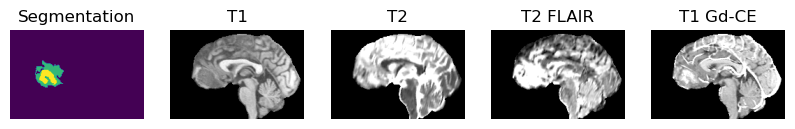

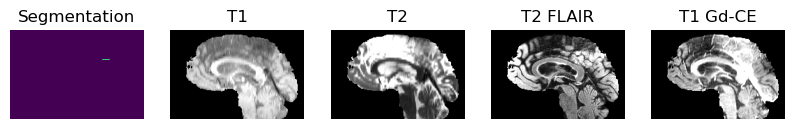

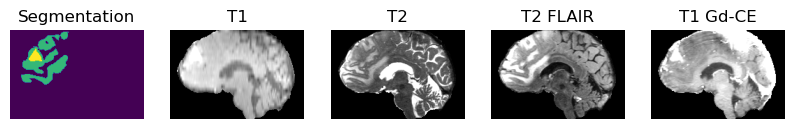

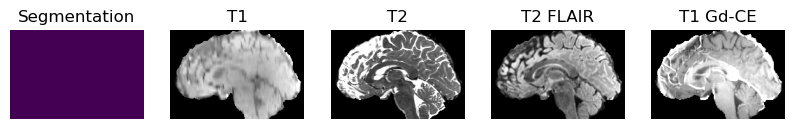

In [211]:
def visualize_n_subjects(n, training_data):
    '''
    Function to visualize n random subjects in Dataset class, training_data.
    '''
    for i in range(n):
        figure = plt.figure(figsize=(10, 10))
        cols, rows = 5, 1

        sample_idx = torch.randint(len(training_data), size=(1,)).item()
        titles_list = ['T1', 'T2', 'T2 FLAIR', 'T1 Gd-CE']

        seg = np.array(training_data[sample_idx][1])
        seg = np.flip(seg.T, axis = 0)
        figure.add_subplot(rows, cols, 1)
        plt.imshow(seg.squeeze())
        plt.title('Segmentation')
        plt.axis("off")

        for i in range(4):
            image = np.array(training_data[sample_idx][0][i])
            image = np.flip(image.T, axis = 0)
            figure.add_subplot(rows, cols, i+2)
            plt.imshow(image.squeeze(), cmap="gray")
            plt.axis("off")
            plt.title(titles_list[i])
        plt.show()

visualize_n_subjects(4, training_data)